## Paso A) Lectura de archivos, y filtrado de StopWords

In [42]:
# Declaración de librerías (nltk, numpy, tensorflow, spacy, stopwords (de nltk) y Tokenizer (de keras))
import nltk
nltk.download('stopwords')
import numpy
import tensorflow
import spacy.cli
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Importamos el núcleo de trabajo en Español de spacy y Stopwords de NLTK
pln_es = spacy.load('es_core_news_sm')
#spacy.cli.download("es_core_news_sm")
#pln_es = spacy.load("es_core_news_sm")
stop_words = nltk.corpus.stopwords.words('spanish')

In [44]:
# Definimos 1 Diccionario con cuatro listas en el interior para ser llenadas con 
# los tokens de entrenamiento que correspondan a cada categoría
X = []

from os import listdir
Tokens = {'Animales': [], 'Lugares': [], 'Objetos': [], 'Personas': []}
Textos_Count = []

path = 'Textos_para_Clasificar/'
#Instruccion para leer varios archivos
for Folder in listdir(path):
    # Apuntamos a la carpeta específica
    for File in listdir(path + Folder):
        with open(path + Folder + "/" + File, encoding="utf8") as Text:
            Texto = ''
            # Leemos el archivo
            Text_String = Text.read()
            # Reemplazamos los caracteres especiales
            Text_String = Text_String.replace(',', '').replace('.', '')
            Text_String = Text_String.replace('(', '').replace(')', '')
            Text_String = Text_String.replace('¿', '').replace('?', '')
            Text_String = Text_String.replace('¡', '').replace('!', '')
            Text_String = Text_String.replace(';', '').replace(':', '')
            Text_String = Text_String.replace("'", '').replace('/', '')
            Text_String = Text_String.replace('\u200b', '')
            Text_String = Text_String.replace('  ', ' ').replace('\n', '')
            
            # Por cada token, si no es una StopWord lo anexamos al texto
            for Token in pln_es(Text_String.lower()):
                if(Token.text not in stop_words):
                    Tokens[Folder].append(Token.text)
                    Texto = Texto + ' ' + Token.text
            # Agregamos a la lista el Texto ya 'destokenizado' donde X contendra todos los textos al final ya sin stopwords
            X.append(Texto)
    Textos_Count.append(len(listdir(path + Folder)))
        
print(X)

[' águila nombre dado mayores aves depredadoras diversas especies subespecies águilas pueden encontrarse casi cualquier parte mundo excepto antártida miembros aves presa orden accipitriformes falconiformes acorde clasificación anterior familia accipitridae subfamilia buteoninae pertenecen varios géneros cuales sujetos reclasificación adecuada puesto expertos llegan opinión consensuada águilas caracterizan principalmente gran tamaño constitución robusta cabeza pico pesadoscomo todas aves presa águilas poseen pico grande poderoso puntiagudo desprender carne presa cuentan tarsos garras poderosas llama atención fuerza águilas posibilita alzar vuelo presas pesadas además poseen vista extremadamente aguda permite visualizar potenciales presas distancia ejemplo águila real posee dos puntos focales ojos mirar frente localizar mirada hacia costados escudriñando distancialas águilas sido utilizadas pueblos símbolo nacional especialmente símbolo imperial mostrando poderío belleza imperio romano g

## Paso B) Generar vector de resultados

In [45]:
# Generamos el vector de respuestas donde (Cada clase tiene una salida numérica asociada)
# Esta clasificación es arbitraria :)
output = []

Y = 0
for Cantidad_Textos in Textos_Count:
    for i in range (Cantidad_Textos):
        output.append(Y)
    Y+=1
# vector de salida de 4 clases con 8 ejemplos de cada una 
#output = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]
    
print("Vector de salidas Y:")
print(output)

Vector de salidas Y:
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]


## Paso C) Obtener las cantidades de tokens y tokens únicos por categoría

In [46]:
# Obtenemos la cantidad de tokens Totales y Únicos de cada clase

# Tokens Totales (No importa si se repiten)
for Categoria in Tokens.keys():
    print('Total de tokens en '+ str(Categoria)+':'+str(len(Tokens[Categoria])))#Tokens es un diccionario recuerda
print("\n")
    
# Tokens Únicos en cada clase (Si se reiten solo se consideran una vez) 
for Categoria in Tokens.keys():
    print('Totla de tokens unicos en '+ str(Categoria)+':'+str(len(set(Tokens[Categoria]))))

Total de tokens en Animales:1094
Total de tokens en Lugares:2020
Total de tokens en Objetos:1256
Total de tokens en Personas:1267


Totla de tokens unicos en Animales:744
Totla de tokens unicos en Lugares:1089
Totla de tokens unicos en Objetos:791
Totla de tokens unicos en Personas:919


## Paso D) Gráfica de los tokens más utilizados (Se repiten más de 5 veces)

<Figure size 432x288 with 0 Axes>

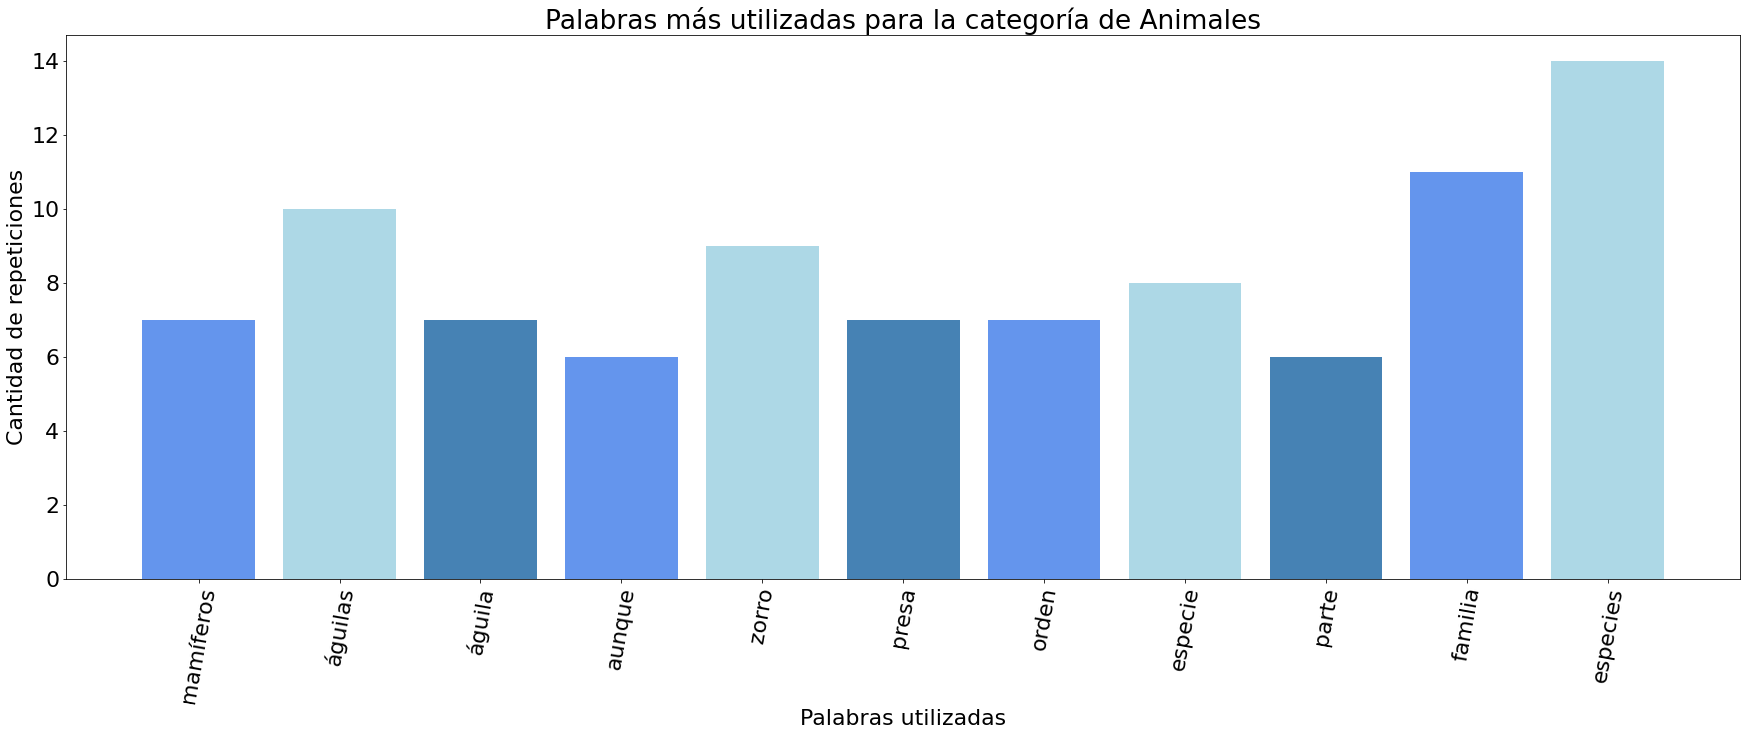

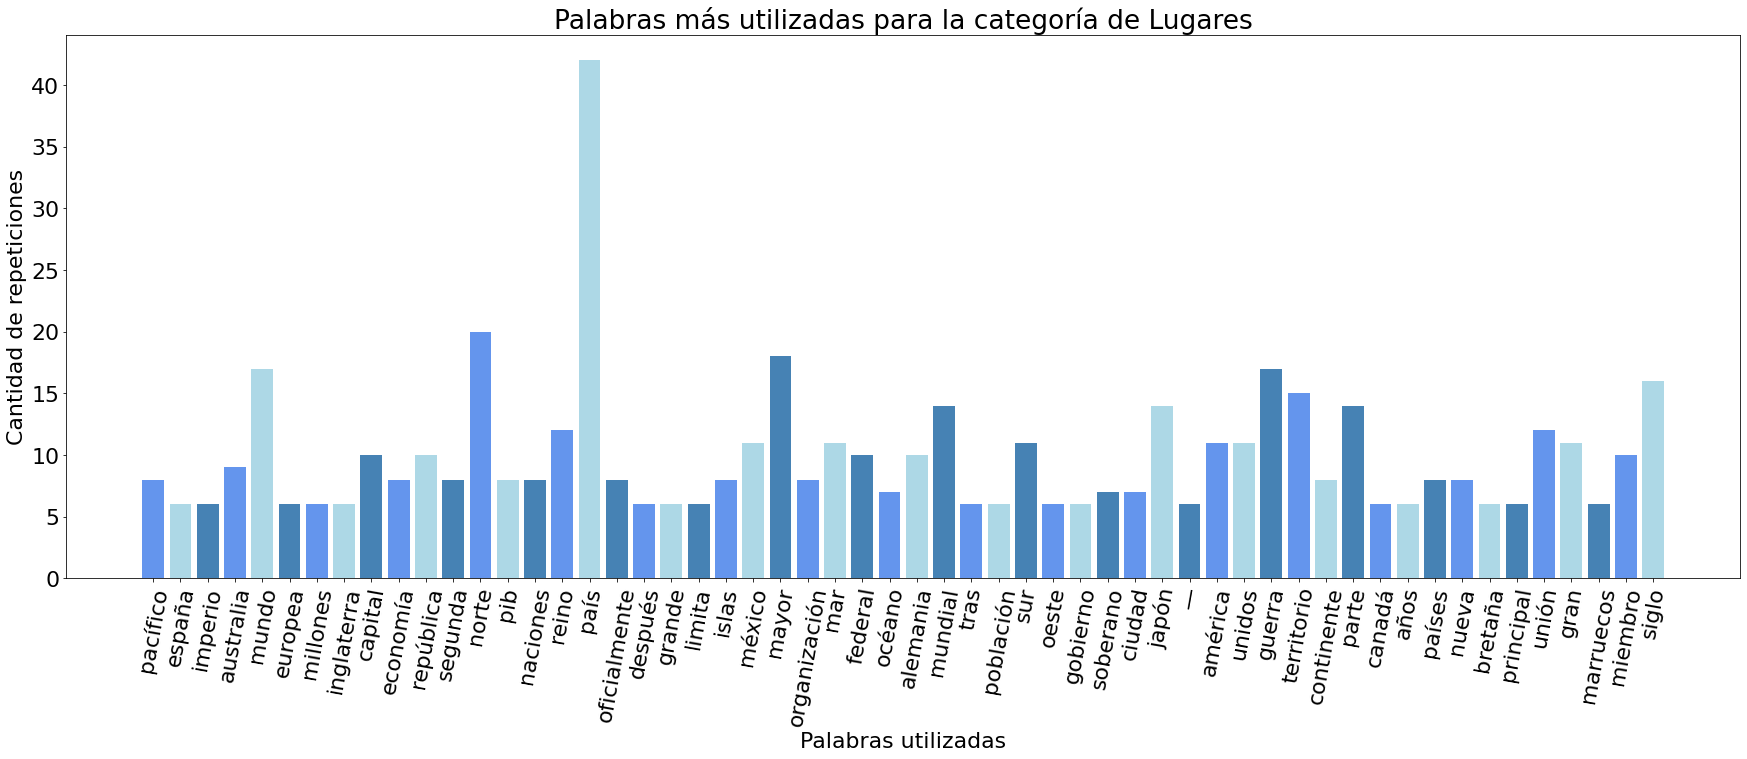

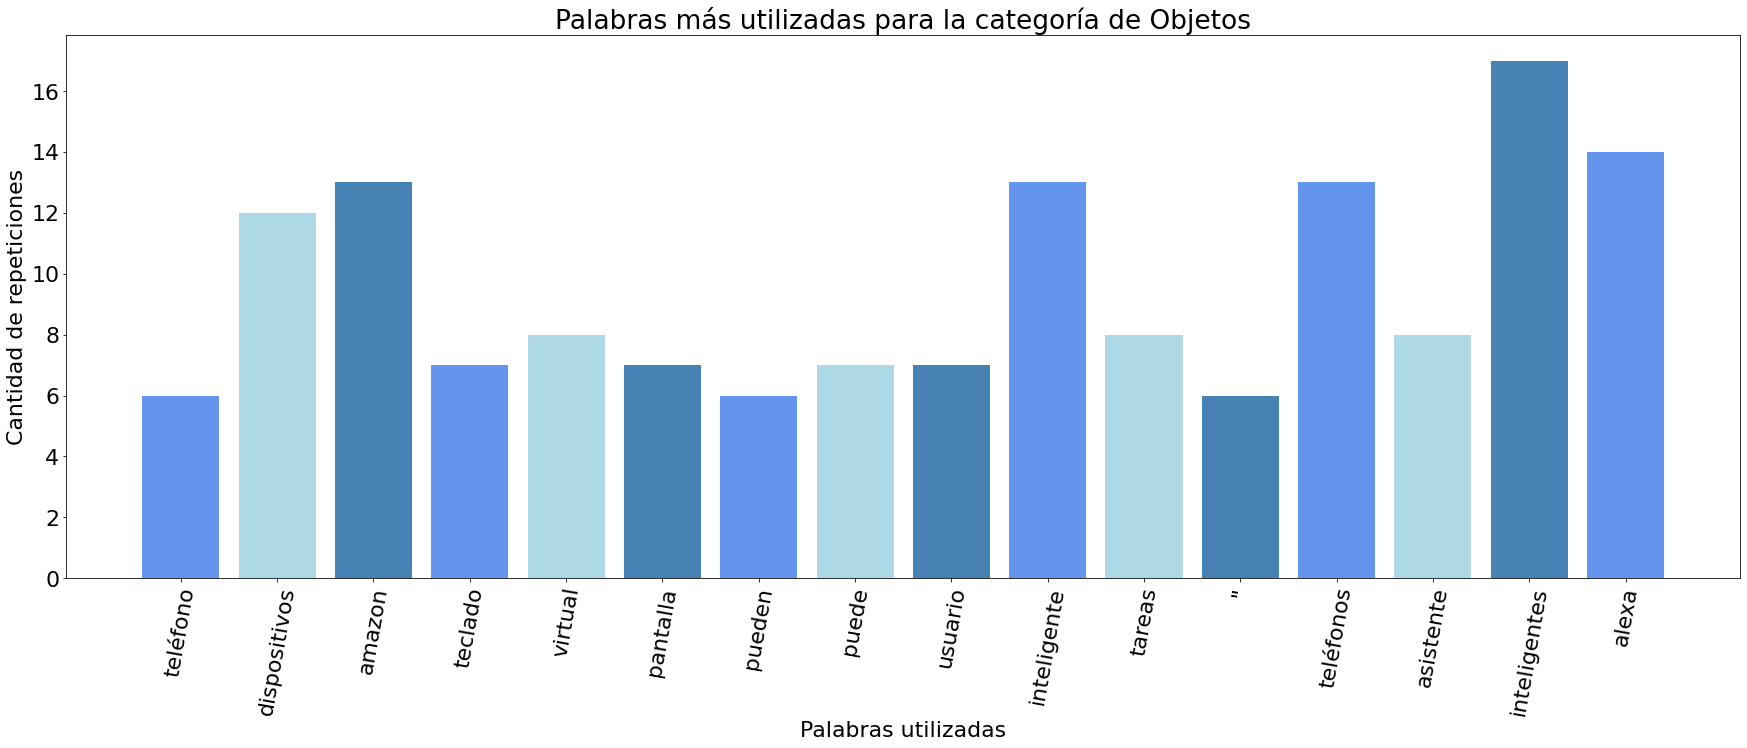

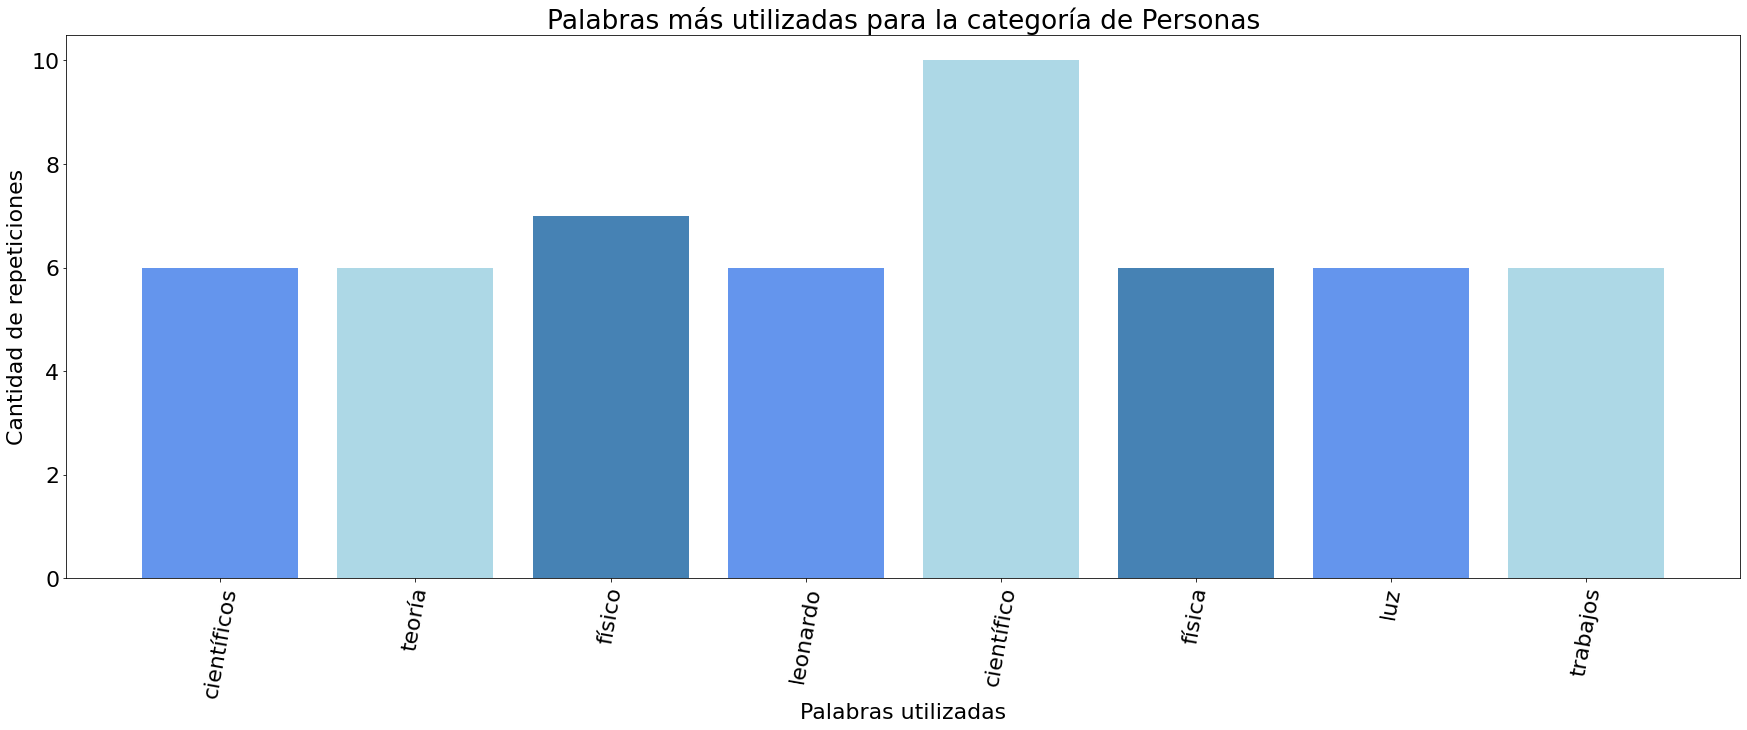

In [47]:
# Imprimimos los tokens más utilizados para cada categoría 
# Que (aparezcan al menos 5 veces)

# Librería para ploteo de gráficos
import matplotlib.pyplot as plt

# Función para extraer la cantidad de palabras de cada categoría
def Plotter(Categoria, x):
    Frecuencias = []
    Keys = []
    Tokens_Unicos = list(set(Tokens[Categoria]))
    for Token in Tokens_Unicos:
        # Solo agregamos a la lista los tokens que aparezcan
        # en la lista origina más de 5 veces
        if Tokens[Categoria].count(Token) > 5:
            Keys.append(Token)
            Frecuencias.append(Tokens[Categoria].count(Token))

    # Parámetros de ploteo (Se va a generar un plot diferente para cada Clase)
    plt.figure(x)
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(30,10))
    plt.bar(Keys, Frecuencias, color=['cornflowerblue', 'lightblue', 'steelblue'])  
    plt.ylabel('Cantidad de repeticiones')
    plt.xlabel('Palabras utilizadas')
    plt.title('Palabras más utilizadas para la categoría de ' + str(Categoria))
    plt.xticks(rotation=80)
    
# Llamamos al método anterior una vez por cada clase
x = 1
for Categoria in Tokens.keys():  
    Plotter(Categoria, x)
    x += 1

## Paso E) Aplicación de padding

In [48]:
# Importamos la librería para generar la matriz de entrada conformada por los textos en X
# (pad_sequence)
from keras.preprocessing.sequence import pad_sequences

# Cantidad de palabras máximas por ejemplo o texto que se quieran considerar, aqui se hacer un recorte a solo 30 
# (Las más utilizadas y que seran las primeras en la lista)
maxlen = 30

# Preparamos la capa de embeddingsn(Predefinimos una cantidad de
# 5000 palabras consideradas como tokens
tokenizer = Tokenizer(num_words=5000)
# Actualiza el vocabulario interno basado en una lista de textos.
# Este método crea el índice de vocabulario basado en la frecuencia de Word
tokenizer.fit_on_texts(X)

#texts_to_sequences Transforma cada texto en textos en una secuencia de enteros. Por lo tanto,
#básicamente toma cada palabra en el texto y la reemplaza con su valor entero correspondiente de Word_index diccionario.
X = tokenizer.texts_to_sequences(X)

# Especificamos la matriz (Con padding hasta maxlen)
X_train = pad_sequences(X, padding='post', maxlen=maxlen)

# Cada número en la matriz corresponde al número de id token en el diccionario. 
#Las dimensiones correspondes al numero de textos (32 en este caso) * maxlen
print("Matriz de entrada:")
print(X_train)

Matriz de entrada:
[[1023 1024   29 1025  330  221 1026   45 1027  505  507 1028   85 1029
   507   14   20  221 1030  508 1031 1032 1033 1034  509   85  492  331
  1035 1036]
 [ 337   93 1074  487  115 1075  333 1076 1077  159   56 1078 1079 1080
   115  533 1081  234   41 1082  336  230   27  235  155    5   89   27
  1083   16]
 [ 238 1108 1109  545  237 1110  237  546 1111 1112  350 1113 1114 1115
  1116   94  350 1117  547   54  351  548  344   96   94 1118 1119  526
    97   67]
 [ 555  226  242  556  116  243  117 1135   31  244  352  240  557 1136
  1137  356  558 1138  357  325   40  557  559  358  359  360 1139  560
   361 1140]
 [ 161  246 1191    7  164 1192 1193 1194 1195 1196  572 1197  118 1198
  1199 1200  362   37 1201   13    8  352 1202  165   47  571 1203 1204
  1205 1206]
 [ 555  578 1225 1226   12   30  540   67  579  529  347  365    4  366
     9   14   67 1227 1228  579  252 1229  254  165    3  580  581 1230
    32  331]
 [ 153 1296 1297    2    4    3  255 12

## Paso F) Uso de embeddings

In [49]:
# Declaración de librerías para manejo de arreglos (asarray)
# y para generar vectores con ceros (zeros), de numpy
from numpy import asarray
from numpy import zeros

# Lectura del archivo de embeddings (Word2Vect es de Google)
embeddings_dictionary = dict()
Embeddings_file = open('D:\Documentos\Lenguaje natural\Word2Vect_Spanish.txt', encoding="utf8")

# Extraemos las características del archivo de embeddings
# y las agregamos a un diccionario (Cada elemento es un vector)
for linea in Embeddings_file:
    caracts = linea.split()
    palabra = caracts[0]
    vector = asarray(caracts[1:], dtype='float32')
    embeddings_dictionary [palabra] = vector
Embeddings_file.close()

In [73]:
len(embeddings_dictionary)#son unmilon de embedings cons 300 caracteristicas cada una


1000654

In [50]:
# Extraemos la cantidad de palabras en el vocabulario
vocab_size = len(tokenizer.word_index) + 1

# Generamos la matriz de embeddings (Con 300 Características)
# por cada palabra en el vocabulario
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    # Extraemos el vector de embedding para cada palabra
    embedding_vector = embeddings_dictionary.get(word)
    # Si la palbra si existía en el vocabulario
    # agregamos su vector de embeddings en la matriz
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [59]:
# Visualización de la matriz de Embeddings
print(embedding_matrix)
print(len(embedding_matrix))

[[ 0.        0.        0.       ...  0.        0.        0.      ]
 [-0.118721 -0.041967  0.113387 ... -0.135572 -0.014877 -0.081089]
 [ 0.087376 -0.037997  0.008766 ... -0.116659  0.10826   0.044782]
 ...
 [ 0.022684 -0.034682  0.093563 ... -0.01371   0.013691 -0.095071]
 [-0.086475 -0.000871  0.009474 ... -0.003015 -0.027608 -0.003512]
 [ 0.056054 -0.005374 -0.015116 ... -0.039423 -0.083715 -0.101793]]
2976


## Paso G) Uso de modelos neuronales 

In [60]:
# Declaración de modelo Secuencial 
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Flatten, Conv1D, GlobalMaxPooling1D

In [61]:
# Declaración de la capa de Embeddings que se utilizará en las arquitecturas
# neuronales. La capa de embeddings tiene dimensiones de:
# Tamaño del vocabulario X 300 características
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], 
                            input_length=X_train.shape[1] , trainable=False)

In [62]:
# Declaramos librería para convertir la salida en un vector 
# de X elementos con activación en la columna correspondiente
# a su categoría
from keras.utils.np_utils import to_categorical 
train_labels = to_categorical(output, num_classes=len(Tokens.keys()))
print('Matriz de salidas')
print(train_labels)

Matriz de salidas
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


# Modelo DNN

In [63]:
model_dnn = Sequential()
model_dnn.add(embedding_layer)
model_dnn.add(Flatten())
model_dnn.add(Dense(len(Tokens.keys()), activation='softmax'))

# Impresión de parámetros del modelo
model_dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model_dnn.summary())

print("\nPalabras en el vocabulario:")
print(vocab_size)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 300)           892800    
_________________________________________________________________
flatten_2 (Flatten)          (None, 9000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36004     
Total params: 928,804
Trainable params: 36,004
Non-trainable params: 892,800
_________________________________________________________________
None

Palabras en el vocabulario:
2976


In [65]:
# Ajuste de los datos de entrenamiento al modelo creado
history_dnn = model_dnn.fit(X_train, train_labels, epochs=30, batch_size=4, verbose=1, validation_split=0.2)

# Cálculo de los procentajes de Eficiencia y pérdida 
score_dnn = model_dnn.evaluate(X_train, train_labels, verbose=1)
print("\nLoss:", score_dnn[0])
print("Accuracy:", score_dnn[1])

Train on 25 samples, validate on 7 samples
Epoch 1/30
25/25 [==============================] - 0s 7ms/step - loss: 1.3160 - acc: 0.2800 - val_loss: 2.0371 - val_acc: 0.0000e+00
Epoch 2/30
25/25 [==============================] - 0s 638us/step - loss: 0.8256 - acc: 0.9600 - val_loss: 2.4655 - val_acc: 0.0000e+00
Epoch 3/30
25/25 [==============================] - 0s 559us/step - loss: 0.5740 - acc: 0.9600 - val_loss: 2.7395 - val_acc: 0.0000e+00
Epoch 4/30
25/25 [==============================] - 0s 559us/step - loss: 0.3934 - acc: 1.0000 - val_loss: 2.9295 - val_acc: 0.0000e+00
Epoch 5/30
25/25 [==============================] - 0s 518us/step - loss: 0.2899 - acc: 1.0000 - val_loss: 3.0142 - val_acc: 0.0000e+00
Epoch 6/30
25/25 [==============================] - 0s 559us/step - loss: 0.2112 - acc: 1.0000 - val_loss: 3.0899 - val_acc: 0.0000e+00
Epoch 7/30
25/25 [==============================] - 0s 557us/step - loss: 0.1640 - acc: 1.0000 - val_loss: 3.1497 - val_acc: 0.0000e+00
Epoch 8

# Modelo CNN + N-Gramas

In [66]:
model_cnn = Sequential()
model_cnn.add(embedding_layer)
# Se describen 128 filtros de 2 caraceterísticas cada uno (Bigramas)
model_cnn.add(Conv1D(30, 2, activation = 'relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(len(Tokens.keys()), activation='softmax'))

# Impresión de parámetros del modelo
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model_cnn.summary())

print("\nPalabras en el vocabulario:")
print(vocab_size)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 300)           892800    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 29, 30)            18030     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 124       
Total params: 910,954
Trainable params: 18,154
Non-trainable params: 892,800
_________________________________________________________________
None

Palabras en el vocabulario:
2976


In [74]:
# Ajuste de los datos de entrenamiento al modelo creado
history_cnn = model_cnn.fit(X_train, train_labels, epochs=30, batch_size=4, verbose=1, validation_split=0.2)

# Cálculo de los procentajes de Eficiencia y pérdida 
score_cnn = model_cnn.evaluate(X_train, train_labels, verbose=1)
print("\nLoss:", score_cnn[0])
print("Accuracy:", score_cnn[1])

Train on 25 samples, validate on 7 samples
Epoch 1/30
25/25 [==============================] - 0s 7ms/step - loss: 1.3723 - acc: 0.3200 - val_loss: 1.6258 - val_acc: 0.0000e+00
Epoch 2/30
25/25 [==============================] - 0s 878us/step - loss: 1.2390 - acc: 0.3600 - val_loss: 1.7525 - val_acc: 0.0000e+00
Epoch 3/30
25/25 [==============================] - 0s 957us/step - loss: 1.1564 - acc: 0.6400 - val_loss: 1.8686 - val_acc: 0.0000e+00
Epoch 4/30
25/25 [==============================] - 0s 838us/step - loss: 1.0759 - acc: 0.7600 - val_loss: 1.9775 - val_acc: 0.0000e+00
Epoch 5/30
25/25 [==============================] - 0s 758us/step - loss: 1.0137 - acc: 0.8800 - val_loss: 2.0477 - val_acc: 0.0000e+00
Epoch 6/30
25/25 [==============================] - 0s 838us/step - loss: 0.9625 - acc: 0.9200 - val_loss: 2.1159 - val_acc: 0.0000e+00
Epoch 7/30
25/25 [==============================] - 0s 997us/step - loss: 0.9135 - acc: 0.9600 - val_loss: 2.1821 - val_acc: 0.0000e+00
Epoch 8

# Modelo LSTM

In [75]:
numpy.random.seed(0)
model_lstm = Sequential()
model_lstm.add(embedding_layer)
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(len(Tokens.keys()), activation='softmax'))

# Impresión de parámetros del modelo
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model_lstm.summary())

print("\nPalabras en el vocabulario:")
print(vocab_size)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 300)           892800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 404       
Total params: 1,053,604
Trainable params: 160,804
Non-trainable params: 892,800
_________________________________________________________________
None

Palabras en el vocabulario:
2976


In [76]:
# Ajuste de los datos de entrenamiento al modelo creado
history_lstm = model_lstm.fit(X_train, train_labels, epochs=30, batch_size=4, verbose=1, validation_split=0.2)

# Cálculo de los procentajes de Eficiencia y pérdida 
score_lstm = model_lstm.evaluate(X_train, train_labels, verbose=1)
print("\nLoss:", score_lstm[0])
print("Accuracy:", score_lstm[1])

Train on 25 samples, validate on 7 samples
Epoch 1/30
25/25 [==============================] - 0s 18ms/step - loss: 1.3706 - acc: 0.1600 - val_loss: 1.5913 - val_acc: 0.0000e+00
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 1.2365 - acc: 0.8000 - val_loss: 1.8925 - val_acc: 0.0000e+00
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 1.0777 - acc: 0.7200 - val_loss: 2.5617 - val_acc: 0.0000e+00
Epoch 4/30
25/25 [==============================] - 0s 5ms/step - loss: 0.9015 - acc: 0.7600 - val_loss: 2.8955 - val_acc: 0.0000e+00
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6716 - acc: 0.8000 - val_loss: 3.7584 - val_acc: 0.0000e+00
Epoch 6/30
25/25 [==============================] - 0s 5ms/step - loss: 0.4618 - acc: 0.8800 - val_loss: 3.2057 - val_acc: 0.0000e+00
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 0.3763 - acc: 0.8400 - val_loss: 4.0858 - val_acc: 0.0000e+00
Epoch 8/30
25/25 [

## Paso H) Curvas de Eficiencia (Train VS Test)

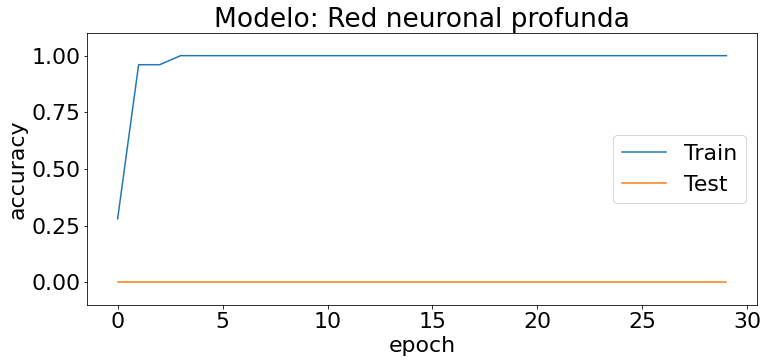

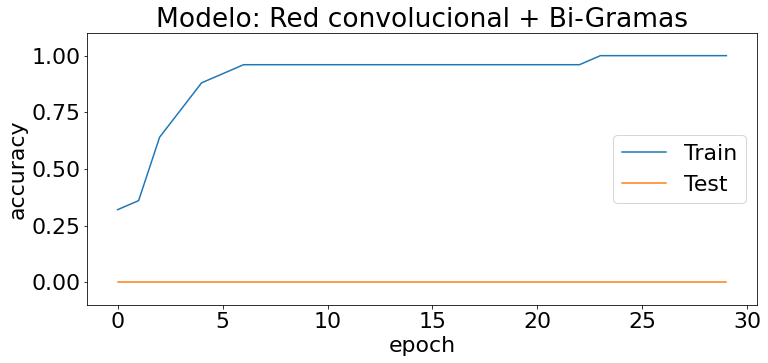

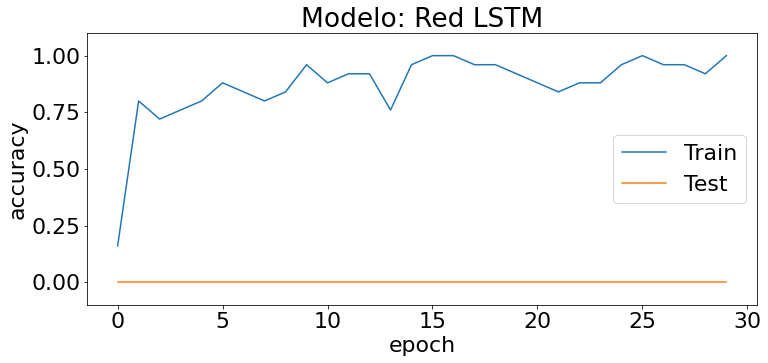

In [77]:
Historiales = [history_dnn, history_cnn, history_lstm]
Nombres = ['Red neuronal profunda', 'Red convolucional + Bi-Gramas', 'Red LSTM']

# Finalmente imprimimos la eficiencia de cada modelo en train y test
# época a época para ver su evolución (Curvas de Eficiencia)
for Historial, Nombre in zip(Historiales, Nombres):
    plt.figure(figsize=(12,5))
    plt.ylim(-0.1, 1.1)
    plt.plot(Historial.history['acc'])
    plt.plot(Historial.history['val_acc'])
    plt.title('Modelo: ' + Nombre)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train','Test'])
    plt.show()

## Paso I) Prueba del modelo

In [78]:
# Módulo instanciador de entradas para el chatbot
# (Convierte el texto de entrada en la secuencia de
# valores enteros con pad_sequences, elimina signos
# de interrogación y acentos)
def Instancer(txt):  
    txt = txt.lower()
    txt = txt.replace(',', '').replace('.', '')
    txt = txt.replace('(', '').replace(')', '')
    txt = txt.replace('¿', '').replace('?', '')
    txt = txt.replace('¡', '').replace('!', '')
    txt = txt.replace(';', '').replace(':', '')
    txt = txt.replace("'", '').replace('/', '')
    txt = txt.replace('\u200b', '')
    txt = txt.replace('  ', ' ').replace('\n', '')
    txt = [txt]
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=maxlen)
    return padded

In [79]:
# Textos cortos
Texto = 'Esta es una persona que nació en algún lugar y que fue un importante científico'
#Texto = 'Este es un animal que tiene una altura promedio de X, y que suele comer carne y nadar, y colar y así'
#Texto = 'Este es algún lugar del mundo con muchos habitantes y un territorio que rodea al país'
#Texto = 'Este es un objeto que tiene características técnicas y que tiene funciones y es tecnología nueva'

# Textos largos
#Texto = 'Los pícidos (Picidae) son una gran familia de aves del orden de las Piciformes que incluye 218 especies conocidas popularmente como pájaros carpinteros, carpinteritos, pitos, picos, picamaderos, picatroncos, picapinos, chupasavias y torcecuellos. Tienen una distribución cosmopolita, con la excepción de Australia, Madagascar y las regiones polares extremas. Pueden ser sedentarias o migratorias; muchas especies permanecen en la misma área durante años, mientras que otras viajan grandes distancias desde sus zonas de reproducción a las zonas de invernada. Al sur de Europa se encuentran las especies de mayor tamaño, albergando solo en la reserva natural de Doñana, en Andalucía, tres especies distintas de estas aves que hayan sido estudiadas hasta ahora, sin contar con la migración que pueda llegar a efectuar el carpintero, ya que es un entorno donde muchas especies de aves hacen su parada en época de migraciones largas.'
#Texto = 'La civilización china, una de las más antiguas del mundo, floreció en la fértil cuenca del río Amarillo. Durante milenios su sistema político se basó en monarquías hereditarias, conocidas como dinastías. La primera de las cuales fue la semimitológica dinastía Xia en torno al 2000 a. C. Desde el 221 a. C., cuando la dinastía Qin conquistó diversos Estados y formó el primer Imperio chino, el país se ha expandido, fracturado y ha sido reformado en numerosas ocasiones. La República de China derrocó a la última dinastía en 1911 y gobernó la China continental hasta 1949. Después de la derrota del Imperio del Japón en la Segunda Guerra Mundial y la retirada de sus tropas de China, el partido comunista se impuso en la Guerra Civil y proclamó la República Popular China en Pekín el 1 de octubre de 1949. El derrotado régimen de la República de China, dominado por el partido Kuomintang trasladó su gobierno a Taipéi y desde entonces, la jurisdicción de la República de China se limita a Taiwán y algunas islas periféricas.'
#Texto = 'Una tableta, en muchos lugares también llamada por el anglicismo tablet, es una computadora portátil de mayor tamaño que un teléfono inteligente o un PDA, se trata de una sola pieza que integra una pantalla táctil (sencilla o multitáctil) que emite luz y con la que se interactúa primariamente con los dedos o un estilete (pasivo o activo), sin necesidad de teclado físico ni ratón. Estos últimos se ven reemplazados por un teclado virtual y, en determinados modelos, por un mini trackball o "bola de seguimiento" integrada en uno de los bordes de la pantalla. En su interior alberga todos los componentes oportunos para funcionar de forma autónoma, siendo su utilidad mayor que la de un móvil pero a su vez menor a la de un ordenador portátil, resultando ser su portabilidad más sencilla y exitosa.'

Modelos = [model_dnn, model_cnn, model_lstm]
Nombres = ['Red neuronal profunda', 'Red convolucional + Bi-Gramas', 'Red LSTM']

In [80]:
print('Texto: ' + Texto + '\n')

for Modelo, Nombre in zip(Modelos, Nombres):
    print('Modelo: ' + str(Nombre) + '\n')
    results = Modelo.predict(Instancer(Texto))
    # Obtener el valor de argmax
    results_index = numpy.argmax(results)
    Clase = list(Tokens.keys())[results_index]

    for i in range(len(results[0])):
        print(list(Tokens.keys())[i] + ' --> ' + str(results[0][i]))
    
    print('\tLa clase ganadora es: ' + str(Clase) + ' (' + str(round(results[0][results_index]*100, 2)) + '%)' + '\n\n')

Texto: Esta es una persona que nació en algún lugar y que fue un importante científico

Modelo: Red neuronal profunda

Animales --> 0.26704183
Lugares --> 0.30508143
Objetos --> 0.27374047
Personas --> 0.15413629
	La clase ganadora es: Lugares (30.51%)


Modelo: Red convolucional + Bi-Gramas

Animales --> 0.16056901
Lugares --> 0.40055007
Objetos --> 0.36790347
Personas --> 0.0709774
	La clase ganadora es: Lugares (40.06%)


Modelo: Red LSTM

Animales --> 0.22604683
Lugares --> 0.27088028
Objetos --> 0.27590138
Personas --> 0.22717154
	La clase ganadora es: Objetos (27.59%)


